In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [3]:
#ls

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from structure_factor.structure_factor import StructureFactor, SymmetricFourierTransform
from structure_factor.spatial_windows import UnitBoxWindow


# test the method get scattering intensity of the calss StructureFactor

creating a poisson point process in a rectangular window as a test sample

In [5]:
def Poisson_process_in_rectangle(xMin, xMax, yMin, yMax, intensity):
    """
    this function simulate a poisson point process of intensity intensity, in a rectangle window     of R^2 of cooredinate (xMin, yMin), (xMax, yMax)
    """
    xDelta = xMax - xMin
    yDelta = yMax - yMin #rectangle dimensions
    total_area = xDelta * yDelta # area of the rectangle
    n_poisson = scipy.stats.poisson(intensity * total_area).rvs()#number of points of the poisson point process
    poisson_points = np.zeros((n_poisson, 2))
    poisson_points[:,0] = xDelta*scipy.stats.uniform.rvs(0, 1, ((n_poisson,1)))[:,0] + xMin #x coordinates of Poisson points
    poisson_points[:,1] = yDelta*scipy.stats.uniform.rvs(0, 1, ((n_poisson, 1)))[:,0] + yMin#y coordinates of Poisson points
    return (poisson_points, n_poisson)

In [9]:
xMin = -100
yMin = xMin
xMax = 100
yMax = xMax
intensity_poisson= 1/np.pi
poisson_points, n_poisson = Poisson_process_in_rectangle(xMin, xMax, yMin, yMax, intensity_poisson)
poisson_points.shape

(12652, 2)

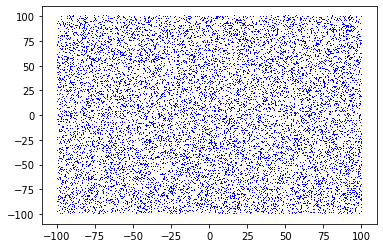

In [10]:
plt.plot(poisson_points[:, 0], poisson_points[:, 1], 'b,')
plt.show()

In [30]:
data_poisson = StructureFactor(poisson_points, intensity_poisson)

testing get_scattering_intensity_estimate on the poisson point process on a vector of waves


In [31]:
norm_wave_vectors_poisson, scattering_intensity_poisson = data_poisson.get_scattering_intensity_estimate(L=200, maximum_wave= 100  )

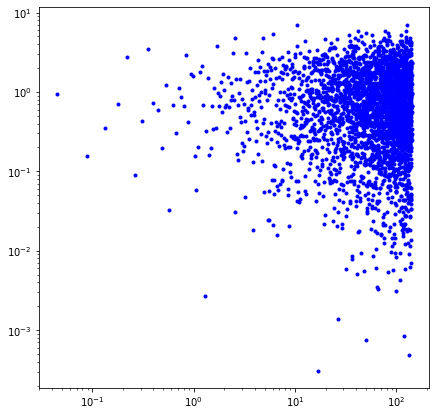

In [32]:
plt.figure(figsize=(7,7))
plt.loglog(norm_wave_vectors_poisson, scattering_intensity_poisson, 'b.')
plt.show()

testing get_scattering_intensity_estimate on the poisson point process on a meshgrid

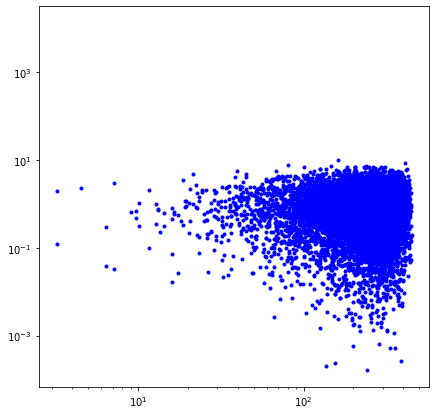

In [33]:
norm_wave_meshgrid_poisson, scattering_intensity_poisson_meshgrid = data_poisson.get_scattering_intensity_estimate(L=200, maximum_wave= 10, meshgrid_size = 100)

plt.figure(figsize=(7,7))
plt.loglog(norm_wave_meshgrid_poisson, scattering_intensity_poisson_meshgrid, 'b.')
plt.show()

In [3]:
import pickle
with open('/Users/dhawat/github/structure-factor/data/data_big_intensity.dat', 'rb') as pickle_file:
    r_pois_2, n_pois_2, pois_2, push_2, equi_2, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")

import pickle
with open('/Users/dhawat/github/structure-factor/data/big_data_wit_tmaxe15.dat', 'rb') as pickle_file:
    r_pois, n_pois_1, pois_1, push_1, equi_1, r_vec_1, v_pois_1, v_push_1, v_equi_1, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")
with open('/Users/dhawat/github/structure-factor/data/big_gin_1.dat', 'rb') as pickle_file_2:
    n_gin, gin = pickle.load(pickle_file_2, encoding="bytes")

In [4]:

my_data_pois = np.array([np.array(np.real(pois_1)).reshape(-1,), np.array(np.imag(pois_1)).reshape(-1,)]).T
my_data_equi = np.array([np.array(np.real(equi_1)).reshape(-1,), np.array(np.imag(equi_1)).reshape(-1,)]).T
my_data_push = np.array([np.array(np.real(push_1)).reshape(-1,), np.array(np.imag(push_1)).reshape(-1,)]).T
my_data_gin = np.array([np.array(np.real(gin)).reshape(-1,), np.array(np.imag(gin)).reshape(-1,)]).T

#data_equi = StructureFactor(my_data_equi)
#data_pois = StructureFactor(my_data_pois)
#data_push = StructureFactor(my_data_push)


/opt/anaconda3/envs/these_project/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
R[write to console]: number of data points exceeds 3000 - computing border correction estimate only

The reliable minimum wavelength is : 2.0106192982974678


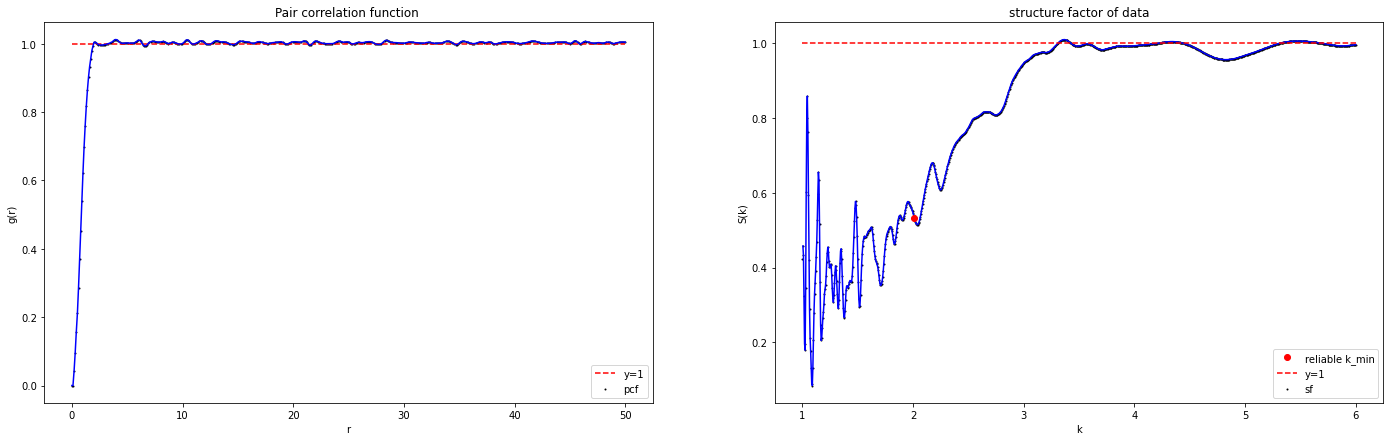

In [5]:
data_gin = StructureFactor(my_data_gin, intensity = 1/np.pi )
r_vec = np.linspace(0,50, 500)
approx_pcf_gin = data_gin.get_pcf_estimate(100, 'fv', 'd', r_vec = r_vec, spar_=0.2 )
wave_lengh = np.linspace(1, 6, 1000 )
approx_sf_gin, k_min = data_gin.get_fourier_estimate('pcf','estimation_2',  k= wave_lengh, N = 160)

# trying to approximate g(0) (la pair correlation function) by Monte Carlo 

In [32]:
r_pcf_ginibre = approx_pcf_gin["r"]
pcf_ginibre = approx_pcf_gin["pcf"]
intensity = 1/ np.pi
MC_ginibre = intensity* 2 * np.pi * np.sum((r_pcf_ginibre[:20]-1)*pcf_ginibre[:20])/ np.shape(r_pcf_ginibre)
MC_ginibre


array([0.01410249])

In [33]:
# the problem is the fluctuation when r get bigger the approximatiom of g are noise !!! so it gives big values that's why i go until 20 not to the end of the vectors

In [20]:
my_data_equi2 = np.array([np.array(np.real(equi_2)).reshape(-1,), np.array(np.imag(equi_2)).reshape(-1,)]).T
data_equi2 = StructureFactor(my_data_equi2, intensity = 1/np.pi )
#r_vec = np.linspace(0,100, 500)
approx_pcf_equi2 = data_equi2.get_pcf_estimate(radius=200, args='ppp', correction_="best" )


/opt/anaconda3/envs/these_project/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


In [21]:
approx_pcf_equi2

,r,theo,iso
0,0.000000,1.0,0.000000e+00
1,0.061799,1.0,7.313552e-14
2,0.123597,1.0,3.652845e-14
3,0.185396,1.0,2.426332e-14
4,0.247195,1.0,1.593849e-14
...,...,...,...
508,31.393763,1.0,1.000958e+00
509,31.455562,1.0,1.001393e+00
510,31.517361,1.0,1.001840e+00
511,31.579159,1.0,1.002076e+00


In [43]:
intensity_equi = 1/np.pi
r_pcf_equi = approx_pcf_equi2["r"]
pcf_equi = approx_pcf_equi2["iso"]
MC_equi = intensity_equi * 2* np.pi*np.sum((r_pcf_equi[:100]-1)*pcf_equi[:100])/ np.shape(r_pcf_equi)
MC_equi


array([0.84114492])

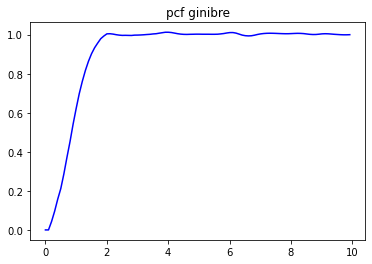

In [44]:
import matplotlib.pyplot as plt
plt.plot(r_pcf_ginibre[:100], pcf_ginibre[:100], 'b')
plt.title("pcf ginibre")
plt.show()

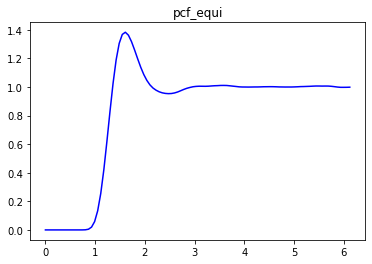

In [42]:
import matplotlib.pyplot as plt
plt.plot(r_pcf_equi[:100], pcf_equi[:100], 'b')
plt.title("pcf_equi")
plt.show()

The reliable minimum wavelength is : 3.1772414814151793


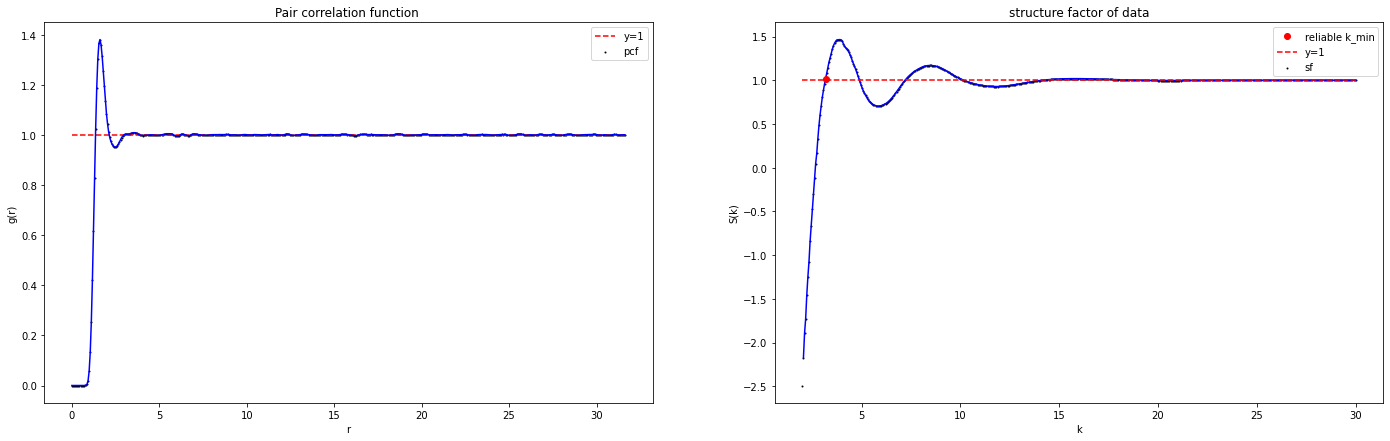

In [28]:

wave_lengh = np.linspace(2, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', k= wave_lengh, h=0.1, N = 1000)

The reliable minimum wavelength is : 3.1772414814151793


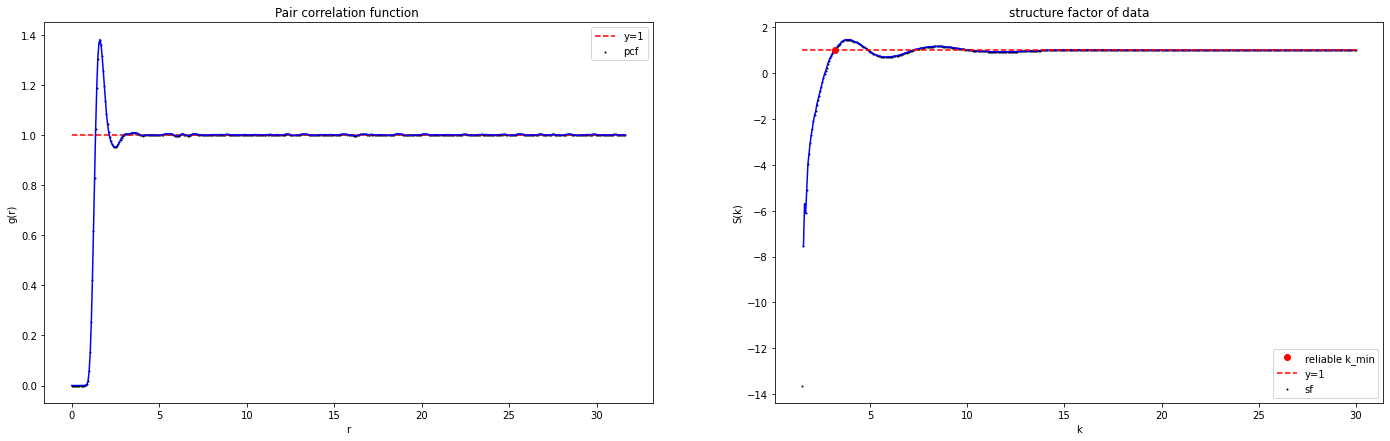

In [15]:

wave_lengh = np.linspace(1.5, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', h=0.1, k= wave_lengh, N = 1000)

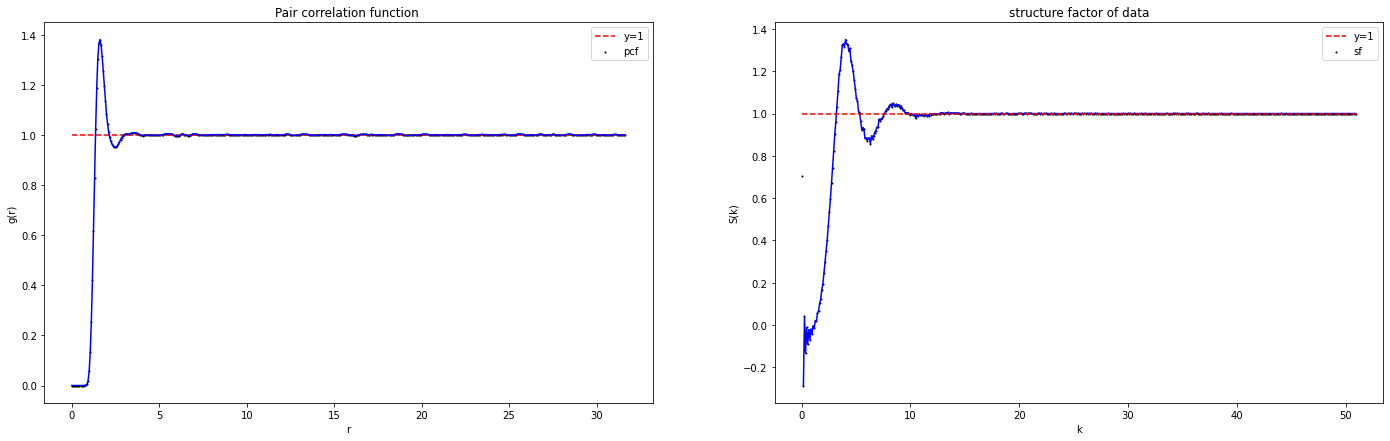

In [16]:

sf_2_equi = data_equi2.get_fourier_estimate('iso','estimation_1')

In [ ]:
L_ = 640
x_pois = np.real(pois_2)
y_pois = np.imag(pois_2)
index_sq_pois = np.logical_and((np.abs(x_pois) < L_) , (np.abs(y_pois) < L_))
x_pois_sq = x_pois[index_sq_pois]
y_pois_sq = y_pois[index_sq_pois]

my_data_pois_rec = np.array([np.array(x_pois_sq).reshape(-1,), np.array(y_pois_sq).reshape(-1,)]).T
data_pois_sq = StructureFactor(my_data_pois_rec, intensity = 1/np.pi )

norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 1001 , arg="1D")



In [ ]:
data_pois_sq.plot_scattering_intensity_estimate(arg="plot")

In [21]:
norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 100, n_k=100 , arg="2D")
data_pois_sq.plot_scattering_intensity_estimate(arg="all")

KeyboardInterrupt: 